In [39]:
import numpy as np

f = dict()
f[(-2, 0)] = 2
f[(-2, 1)] = 2
f[(1, 0)] = 1
f[(1, 1)] = 1

T = 10000
n_experiment = 100
eps = 0.01


all_res = []
for i_experiment in range(n_experiment):
    res = []
    data = dict()
    # data for each arm
    data[0] = [0, 0]
    data[1] = [0, 0]

    theta0 = 0
    theta1 = 0
    for t in range(T):
        Xt = [-1, 0][np.random.randint(0, 2)]
        if Xt == -1:
            Xt_tilde = np.random.choice([-2, 1], p=[2/3, 1/3])
        else:
            Xt_tilde = np.random.choice([-2, 1], p=[1/3, 2/3])
        Y1 = theta0 * Xt_tilde
        Y2 = theta1 * Xt_tilde
        idx = np.argmax([Y1, Y2])
        if idx == 0:
            At = np.random.choice([0, 1], p=[1-eps, eps])
        else:
            At = np.random.choice([0, 1], p=[eps, 1-eps])
        Yt = 3*Xt if At == 0 else 3*Xt
        data[At][0] += Xt_tilde**2
        data[At][1] += Yt * Xt_tilde
        theta0 = data[0][1] / (data[0][0] + 0.0001)
        theta1 = data[1][1] / (data[1][0] + 0.0001)
        res.append((theta0, theta1))
    all_res.append(res)

In [59]:
import numpy as np

f = dict()
f[(-2, 0)] = 2
f[(-2, 1)] = 2
f[(1, 0)] = 1
f[(1, 1)] = 1

T = 10000
n_experiment = 100
all_res = []

for i_experiment in range(n_experiment):
    data = dict()
    # data for each arm
    data[0] = [0, 0, 0]  # [sum of X, sum of Y, number of pulls]
    data[1] = [0, 0, 0]
    eps = 0.1

    theta0 = 0
    theta1 = 0

    res = []

    for t in range(1, T+1):
        Xt = [-1, 0][np.random.randint(0, 2)]
        if Xt == -1:
            Xt_tilde = np.random.choice([-2, 1], p=[2/3, 1/3])
        else:
            Xt_tilde = np.random.choice([-2, 1], p=[1/3, 2/3])
        
        # Calculate UCB for each arm
        Y1 = theta0 * Xt_tilde
        Y2 = theta1 * Xt_tilde
        ucb0 = Y1 + np.sqrt(2 * np.log(t) / (data[0][2] + 0.0001))
        ucb1 = Y2 + np.sqrt(2 * np.log(t) / (data[1][2] + 0.0001))
        
        # Choose arm with highest UCB
        idx = 0 if ucb0 > ucb1 else 1
        if idx == 0:
            At = np.random.choice([0, 1], p=[1-eps, eps])
        else:
            At = np.random.choice([0, 1], p=[eps, 1-eps])
        
        Yt = 3*Xt if At == 0 else 1*Xt
        data[At][0] += Xt_tilde**2
        data[At][1] += Yt * Xt_tilde
        data[At][2] += 1
        
        theta0 = data[0][1] / (data[0][0] + 0.0001)
        theta1 = data[1][1] / (data[1][0] + 0.0001)
        res.append((theta0, theta1))
    all_res.append(res)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


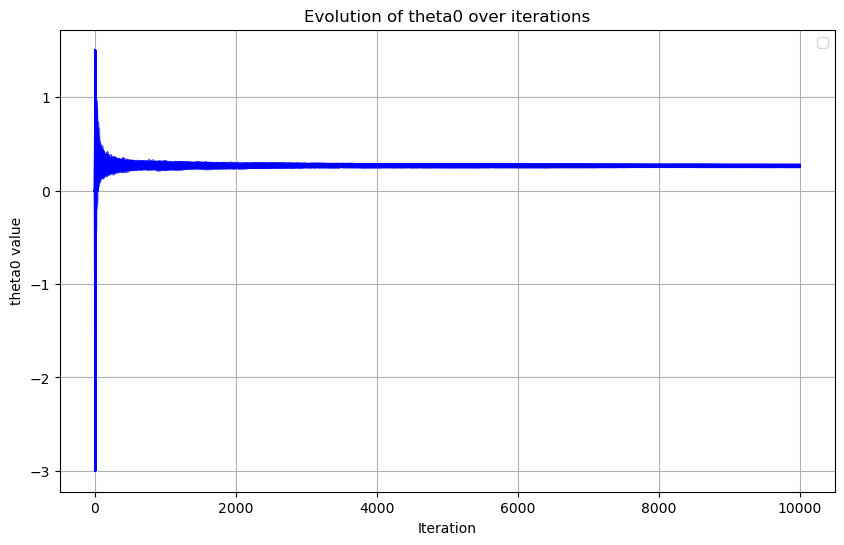

In [60]:
import matplotlib.pyplot as plt

# Extract theta0 values from the res list
# theta0_values = [pair[0] for pair in res][1000:]

# Create a line plot for theta0
plt.figure(figsize=(10, 6))
for i_experiment in range(n_experiment):
    plt.plot(range(len(all_res[i_experiment])), [all_res[i_experiment][i][0] for i in range(len(all_res[i_experiment]))], color='blue', alpha=0.6)
# plt.ylim(0, 0.8)
plt.xlabel('Iteration')
plt.ylabel('theta0 value')
plt.title('Evolution of theta0 over iterations')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
all_res[0][-1][0] 

0.46766525726374336

In [50]:
all_res[0][-1][1] 

0.46774774437659283

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


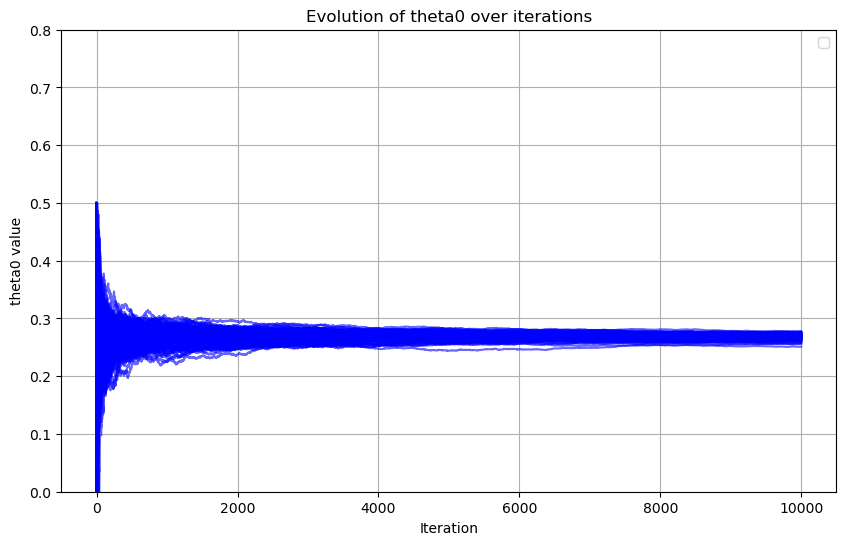

In [61]:
import matplotlib.pyplot as plt

# Extract theta0 values from the res list
# theta0_values = [pair[0] for pair in res][1000:]

# Create a line plot for theta0
plt.figure(figsize=(10, 6))
for i_experiment in range(n_experiment):
    plt.plot(range(len(all_res[i_experiment])), [all_res[i_experiment][i][1] for i in range(len(all_res[i_experiment]))], color='blue', alpha=0.6)
plt.ylim(0, 0.8)
plt.xlabel('Iteration')
plt.ylabel('theta0 value')
plt.title('Evolution of theta0 over iterations')
plt.legend()
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


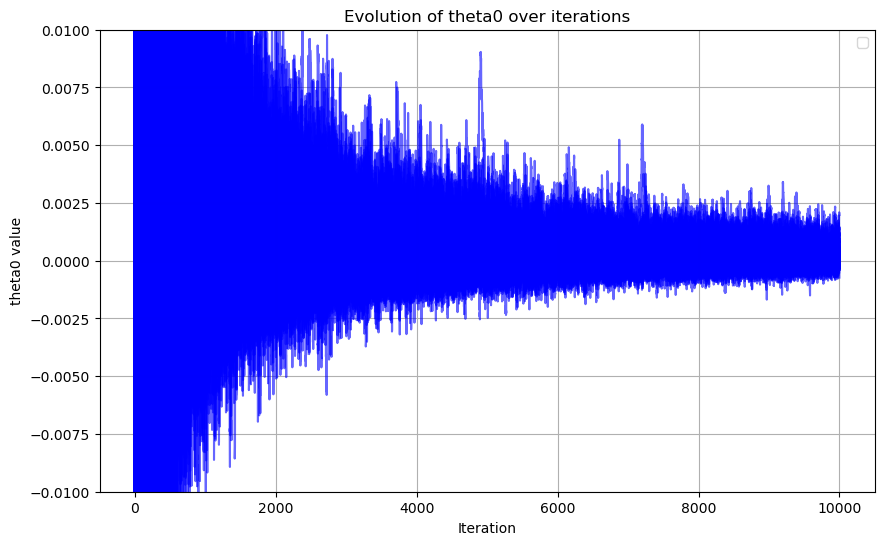

In [62]:
import matplotlib.pyplot as plt

# Extract theta0 values from the res list
# theta0_values = [pair[0] for pair in res][1000:]

# Create a line plot for theta0
plt.figure(figsize=(10, 6))
for i_experiment in range(n_experiment):
    plt.plot(range(len(all_res[i_experiment])), [all_res[i_experiment][i][0] - all_res[i_experiment][i][1] for i in range(len(all_res[i_experiment]))], color='blue', alpha=0.6)
plt.ylim(-0.01, 0.01)
plt.xlabel('Iteration')
plt.ylabel('theta0 value')
plt.title('Evolution of theta0 over iterations')
plt.legend()
plt.grid(True)
plt.show()
